In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_8_calculus.ipynb")

# Area under an elliptic paraboloid

Use the monte carlo technique in the tutorial to estimate the area under the 2D elliptic parabaloid

Your code should work even if the center and scale values shift (provided the parabaloid is still above the z = 0 plane)

Slides: https://docs.google.com/presentation/d/1sq3ERLBET1ourJZJzXMtJe6-cN8Tlt-GLEzSDOxrd0M/edit?usp=sharing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

# Create the function

TODO: Create a function with the center/scale parameters bound to the given values.

You might find it useful to go back to **a_tutorial_fmin** to remember how to bind parameters to create a simple function to use using **partial**.

Also get the plotting code from that file and add that to the plot question below; you can then add plotting the samples as you work through this lab.

In [3]:
# A fancier quadratic-y type function (but in 2D)
def elliptic_paraboloid(x, y, x0=0, y0=0, sclx=1, scly=1):
    """ x,y -> f(x) in the shape of a 'bowl'
    @param x - x value in the plane
    @param y - y value in the plane
    @param x0 - amount to shift the bottom of the bowl by in x
    @param y0 - amount to shift the bottom of the bowl by in y
    @param sclx - scale the bowl's side in x
    @param scly - scale the bowl's side in y
    @returns - f(x,y) the bowl's height over the point x,y
    """
    return (x-x0)**2 / sclx**2 + (y-y0)**2 / scly**2

In [4]:
# Paramaters to bind
sclx = 1.5
scly = 0.75
x0 = 1.0
y0 = 2.0

# TODO: Use partial to create a function with the parameters bound to the above values
my_func = partial(elliptic_paraboloid, x0=x0, y0=y0, sclx=sclx, scly=scly)

In [5]:
print(f"Func at x0, y0 is {my_func(x0, y0)}, expected 0.0")
print(f"Func at 2.0, 2.0 is {my_func(2.0, 2.0)}, expected 0.4444")

Func at x0, y0 is 0.0, expected 0.0
Func at 2.0, 2.0 is 0.4444444444444444, expected 0.4444


In [6]:
grader.check("create_func")

create_func results: All test cases passed!

# Generating samples (see tutorial)

TODO: Generate samples in x, y, and z inside the "box" that contains the function

For this problem you do NOT need to worry about the function being above/below the zero line - the whole function is positive (z >= 0)

For this problem use z_min = 0 (i.e., put the box from 0 to z_max)

- samples need to be in the box
- Find the max z value of the elliptic paraboloid using the provided grid samples
- Generate samples using np.random.uniform (you can use something fancier if you want)
- Calculate the area of the box
- You need to generate x, y, and z samples - 3D points - in the box
- I suggest generating the points, drawing them, then do the area calculation (next question)

I've set x bds to be 2 and the y bds to be 3, which means we'll sample from x +- 2 and y +- 3 in the x,y directions


In [7]:
# Make it easy to change the number of samples.
#. Reminder: You need the same number of samples in all directions (x,y, and z)
n_samples = 100000

# This is the size of the box around x,y - 
bds_x = 2
bds_y = 3

# Which means that the size of the box (in x and y) is... What is bds_x + bds_y?

# Doing the meshgrid for you - notice the +- bds from x0 and y0, which is the bounds we'll use for this problem
# These are NOT the random samples you want - this is a grid of samples to use for creating the surface
# ... you can also use it to find the min/max values of the function (the height to use for the box/maximum z value)
#
# Use 0 for the lower bound in z
xs_grid, ys_grid = np.meshgrid(np.linspace(x0 - bds_x, x0 + bds_x), np.linspace(y0 - bds_y, y0 + bds_y))

zs_grid = my_func(xs_grid, ys_grid)

# TODO: Calculate the maximum z value by evaluating my_func on all of the samples and take the max (ellipse_max) 
# TODO: Generate samples in x, y, and z inside the "box" using np.random.uniform



ellipse_max = np.max(zs_grid)
xs_samples = np.random.uniform(x0 - bds_x, x0 + bds_x, n_samples)   
ys_samples = np.random.uniform(y0 - bds_y, y0 + bds_y, n_samples)    
zs_samples = np.random.uniform(0, ellipse_max, n_samples)   # Samples from 0 to ellipse_max
area_box = (2 * bds_x) * (2 * bds_y) * ellipse_max

print(f"Ellipse_max is {ellipse_max}, expected 17.777")
print(f"Box area is {area_box}, expected 2*bds_x X 2*bds_y X ellipse_max = {2*bds_x} * {2*bds_y} * {ellipse_max} = 426.666")

Ellipse_max is 17.77777777777778, expected 17.777
Box area is 426.6666666666667, expected 2*bds_x X 2*bds_y X ellipse_max = 4 * 6 * 17.77777777777778 = 426.666


In [8]:
# CHECKS
# the mean of the xs samples should be x0, and all of the values should be between x0-2 and x0+2
# (same for ys samples, only centered around y0)

In [9]:
grader.check("samples")

samples results: All test cases passed!

# Points above/below

TODO: Are the samples above or below the surface? (see tutorial)

- Evaluate the function on all of the x,y samples
- Calculate the number of samples that are below the function
- Calculate the number of samples that are at (or above) the function
-  NOTE: The sum of those should be the number of samples

The ratio is the number of samples below / number of samples

Note: that you can assume the function is above the z=0 plane, so you only need to check if the sample is below **my_func(x,y)**

Note: The number points that are below should be around 30%, but it can vary quite a lot if n_samples is small.

You might also want to create a boolean array so that you can re-use it in the print:

**b_under = samples < function**

Note: We are NOT doing the above a line below a line (the more complicated example in the tutorial) because we know the function is always greater than zero. So you just need to count z_sample < my_fuc(x_sample, y_sample).

In [10]:
# EXAMPLE CODE
# This is just an example of using np.count_zero and boolean indexing to do this calculation
n_example_samples = 20
my_example_array = np.random.uniform(-1.0, 2.0, n_example_samples)  # n_example_samples samples between -1.0 and 2.0 

# Boolean indexing - returns an array of True/Falses that is the same size as my_example_array
b_less_than_zero = my_example_array < 0.0

# Now count the number - True is non-zero. count_zero will count Falses
n_to_left_of_zero = np.count_nonzero(b_less_than_zero)

# Should be roughtly 1/3, since my sampling range was -1.0 to 2.0
ratio = n_to_left_of_zero / n_example_samples
print(f"Ratio {ratio} make n_example_samples bigger to get this closer to 1/3")

Ratio 0.3 make n_example_samples bigger to get this closer to 1/3


In [11]:
zs_surface = my_func(xs_samples, ys_samples)

b_under = zs_samples < zs_surface

n_under = np.count_nonzero(b_under)

ratio = n_under / n_samples

area_under = area_box * ratio
# The more samples you use, the closer to the correct answer you get. This is with 100000 sample points.
print(f"Percentage of those below should be around 0.3333; note that the bigger you make n_samples, the more likely you are to get close to the right answer")
print(f"Area is {area_under}, expected to be around 0.33 of box area, which is around 0.333 * 426.666 = 142.")

Percentage of those below should be around 0.3333; note that the bigger you make n_samples, the more likely you are to get close to the right answer
Area is 142.04586666666668, expected to be around 0.33 of box area, which is around 0.333 * 426.666 = 142.


In [12]:
# CHECKS
# The sum of the number of points above and the number of points below should be n_samples
# If you are not getting the right area or ratio, skip ahead to the plot function and see if 
#   a) plot all of the points - they should be uniformly distributed in a box around the surface
#   b) plot JUST the above (or below) points and see if they are, indeed, above or below

In [13]:
grader.check("area")

area results: All test cases passed!

<!-- BEGIN QUESTION -->

# Plot the function and the points above and below

TODO Grab the plotting code from the fmin tutorial then add in plotting the samples, then separate them by whether or not they're under the surface

/Users/nicolascampbell/Git/IntroPythonProgramming/.venv/lib/python3.12/site-packages/mpl_toolkits/mplot3d/art3d.py:1403: RuntimeWarning: divide by zero encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/nicolascampbell/Git/IntroPythonProgramming/.venv/lib/python3.12/site-packages/mpl_toolkits/mplot3d/art3d.py:1403: RuntimeWarning: overflow encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


Text(0.5, 0.5, 'y')

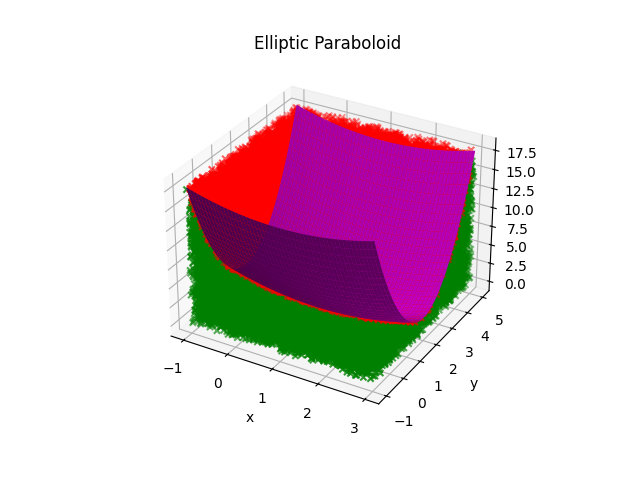

In [14]:
# Use interactive/3D widg3t
%matplotlib widget

# Notice the subplot_kw argument - this lets matlab know we want to plot in 3D and how to set the camera
fig, axs = plt.subplots(subplot_kw={"projection": "3d"})

# TODO: Plot the samples in two colors
# TODO: Plot the surface

axs.plot_surface(xs_grid, ys_grid, zs_grid, color='m')

axs.scatter(xs_samples[b_under], ys_samples[b_under], zs_samples[b_under], color='g', marker='x')
axs.scatter(xs_samples[~b_under], ys_samples[~b_under], zs_samples[~b_under], color='r', marker='x')

axs.set_title("Elliptic Paraboloid")
axs.set_xlabel('x')
axs.set_ylabel('y')

In [15]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [16]:

# List of names (creates a set)
worked_with_names = {"N/A"}
# List of URLS 2S5 (creates a set)
websites = {"N/A"}
# Approximate number of hours, including lab/in-class time
hours = 2

In [17]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

All the usual - rerun, remove print statements, save. If your plotting has issues 1 - order matters, if you plot the surface before the points it will look different than the other way around. VSCode is pretty good with the 3D plots, but your results may vary with other interpreters. We will not take points off for that.

- Submit this .ipynb file to lab 8 (calculus)

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

This submit rarely fails. But if it does, make sure you're number of samples is under 100000 or it will time out